1. Preparación del Entorno:
- Instalar Gensim y otras librerías necesarias.
- Descargar modelos pre-entrenados de Word2Vec

In [2]:
import gensim.downloader as api

In [3]:
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


2. Toma de contacto:
- Familiarizarse con la API de Gensim para el acceso a los vectores de palabras.

In [4]:
vector_king = model['king']
vector_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [5]:
similarity = model.similarity('king', 'queen')
print("La similitud entre 'king' y 'queen' es:", similarity)

La similitud entre 'king' y 'queen' es: 0.6510957


In [6]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print("Resultado de la analogía 'man:woman :: king:?':", result)

Resultado de la analogía 'man:woman :: king:?': [('queen', 0.7118193507194519)]


3. Análisis Exploratorio:
- Seleccionar un conjunto de palabras para análisis (por ejemplo, "ciencia", "arte",
"tecnología").
- Obtener los vectores correspondientes .
- Calcular y comparar la similaridad entre pares de palabras.

In [9]:
palabras = ['science', 'art', 'technology']

vectores = {palabra: model[palabra] for palabra in palabras}

# Calcular y comparar similaridades
similaridades = {}
for i, palabra1 in enumerate(palabras):
    for palabra2 in palabras[i+1:]:
        similaridad = model.similarity(palabra1, palabra2)
        similaridades[f"{palabra1}-{palabra2}"] = similaridad

# Imprimir similaridades
for par, sim in similaridades.items():
    print(f"Similaridad entre {par}: {sim}")

Similaridad entre science-art: 0.3424762487411499
Similaridad entre science-technology: 0.4275681972503662
Similaridad entre art-technology: 0.29598599672317505


4. Tareas Específicas:
- Analogías: Resolver analogías como "París es a Francia lo que Tokio es a ¿qué?"
- Palabras más similares: Identificar las palabras más similares a un término dado en cada
modelo.
- Divergencias: Encontrar ejemplos de palabras cuyas representaciones son notablemente
diferentes.

- Analogía

In [17]:
analogia = model.most_similar(positive=['Tokio', 'Francia'], negative=['París'], topn=1)
print("París es a Francia lo que Tokio es a:", analogia[0][0])

París es a Francia lo que Tokio es a: Funabashi


  - Palabras similares

In [13]:
palabras_similares = model.most_similar('technology', topn=5)
print("Las palabras más similares a 'technology' son:", palabras_similares)

Las palabras más similares a 'technology' son: [('technologies', 0.8332264423370361), ('innovations', 0.6230790615081787), ('technological_innovations', 0.6102177500724792), ('technol', 0.6047338247299194), ('technological_advancement', 0.6036396622657776)]


Divergencias

In [19]:
similares_invierno = model.most_similar('winter', topn=5)
similares_verano = model.most_similar('summer', topn=5)

print("Palabras similares a 'winter':", similares_invierno)
print("Palabras similares a 'summer':", similares_verano)


Palabras similares a 'winter': [('summer', 0.7155518531799316), ('winters', 0.7001105546951294), ('wintertime', 0.6972676515579224), ('spring', 0.6890672445297241), ('springtime', 0.6532734632492065)]
Palabras similares a 'summer': [('spring', 0.7650764584541321), ('winter', 0.7155519723892212), ('summertime', 0.691234290599823), ('summers', 0.6734901070594788), ('autumn', 0.6497201919555664)]


5. Visualización:
- Utilizar técnicas de reducción de dimensionalidad (como PCA o t-SNE) para visualizar los
vectores de un conjunto seleccionado de palabras.


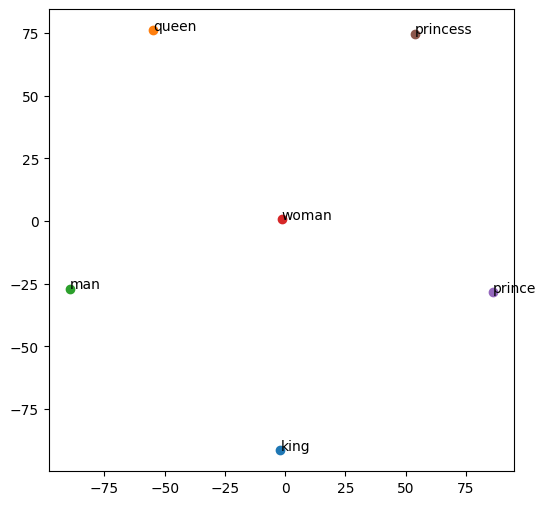

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # Importa NumPy

# Lista de palabras a visualizar
palabras = ['king', 'queen', 'man', 'woman', 'prince', 'princess']
vectores = [model[palabra] for palabra in palabras]

# Convierte la lista de vectores a un array de NumPy
vectores_np = np.array(vectores)

# Reducción de dimensionalidad
tsne = TSNE(n_components=2, perplexity=5)
vectores_2d = tsne.fit_transform(vectores_np)

# Gráfica
plt.figure(figsize=(6,6))
for punto, palabra in zip(vectores_2d, palabras):
    plt.scatter(punto[0], punto[1])
    plt.text(punto[0] + 0.02, punto[1] + 0.02, palabra)

plt.show()
